<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1:Diana Escobar
- Nombre de alumno 2:Matías Donoso


### **Link de repositorio de GitHub:** `https://github.com/Diana1020/Diana`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [3]:
# Leer el dataset
df= pd.read_csv("fruit_vegetables.csv")

In [4]:
# Crear máscara con elementos de búsqueda y seleccionar, Tomato que empiecen, apple, banana, lechuga,tofu, pero apple que comience

#Que empice con apple

mask = df['Commodity'].str.contains('^Tomato|^apple|^banana|^tofu|^Lettuce', case=False)
df2 = df[mask]
df2


,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
...,...,...,...,...,...,...,...
197075,197075,Tomato Small(Terai),2021-05-13,KG,35.0,40.0,37.5
197120,197120,Lettuce,2021-05-13,Kg,50.0,60.0,55.0
197126,197126,Tofu,2021-05-13,Kg,90.0,100.0,95.0
197127,197127,Apple(Fuji),2021-05-13,KG,250.0,270.0,260.0


In [5]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df2 = df2.groupby('Date')['Average'].sum()

<ipython-input-5-1849891e7497>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


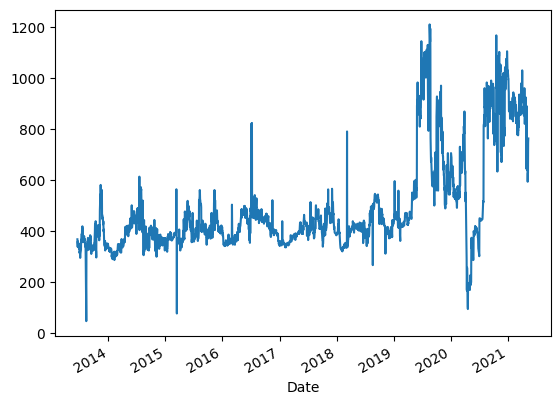

In [6]:
# Graficar serie de tiempo
df2.plot()
plt.show()


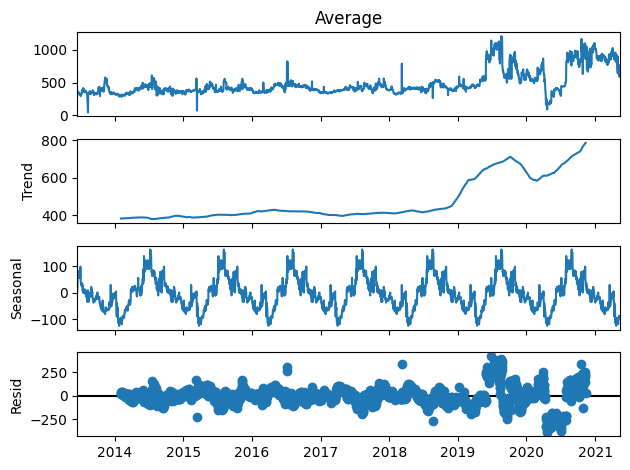

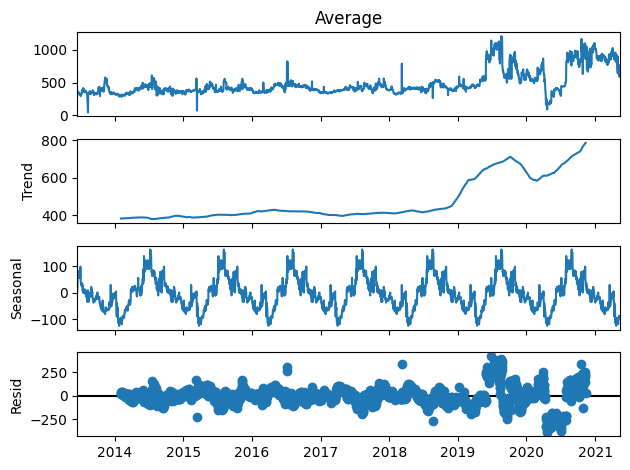

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Realizar descomposición de la señal, utilizado seasonal_decompose

result = seasonal_decompose(df2, period=365)
result.plot()



In [42]:
# Realizar Hold Out de 70/30
n = df2.shape[0]
train = df2.iloc[:int(n*0.7)]
test = df2.iloc[int(n*0.7):]




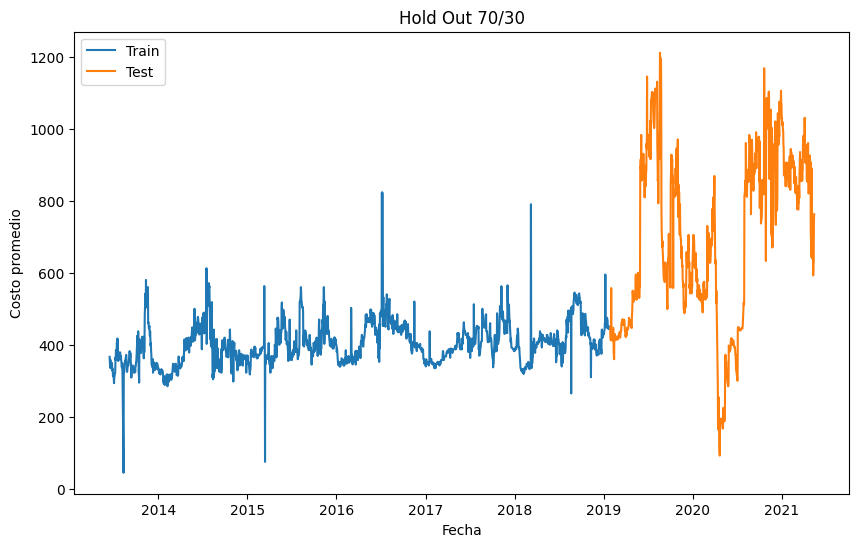

In [43]:
# Graficar Hold Out
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.title('Hold Out 70/30')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio')

plt.show()

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [9]:
#instalamos prophet
%pip install prophet

In [10]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [48]:
#Generar dataframe de entrenamiento y testeo
df_train = pd.DataFrame(train)
df_train.reset_index(inplace=True)
df_train.columns = ['ds', 'y']

df_test = pd.DataFrame(test)
df_test.reset_index(inplace=True)
df_test.columns = ['ds', 'y']



In [49]:
# Respuesta

# Crear dataframe con columnas de entrenamiento y testeo
df_train = pd.DataFrame(train)
df_train.reset_index(inplace=True)


df_test = pd.DataFrame(test)
df_test.reset_index(inplace=True)

df_train=df_train.rename(columns={"Date": "ds", "Average": "y"})

df_test=df_test.rename(columns={"Date": "ds", "Average": "y"})



**2. Modelo y entrenamiento**

In [50]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas

model = Prophet()
model.fit(df_train)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/vdjlq565.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/rmiqf6r1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10082', 'data', 'file=/tmp/tmpl852apsb/vdjlq565.json', 'init=/tmp/tmpl852apsb/rmiqf6r1.json', 'output', 'file=/tmp/tmpl852apsb/prophet_modelkwzo_dnv/prophet_model-20240527022224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:22:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [51]:
# Respuesta

forecast = model.predict(df_test)
forecast



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-28,435.765483,332.756685,441.672085,435.765483,435.765483,-48.301130,-48.301130,-48.301130,-2.649129,-2.649129,-2.649129,-45.652001,-45.652001,-45.652001,0.0,0.0,0.0,387.464352
1,2019-01-29,435.828947,334.901732,445.634218,435.828947,435.828947,-47.069210,-47.069210,-47.069210,0.146507,0.146507,0.146507,-47.215716,-47.215716,-47.215716,0.0,0.0,0.0,388.759738
2,2019-01-30,435.892412,335.323702,448.637094,435.892412,435.892412,-46.998595,-46.998595,-46.998595,1.782596,1.782596,1.782596,-48.781191,-48.781191,-48.781191,0.0,0.0,0.0,388.893818
3,2019-01-31,435.955877,329.137257,440.883576,435.955877,435.955877,-50.716186,-50.716186,-50.716186,-0.384527,-0.384527,-0.384527,-50.331659,-50.331659,-50.331659,0.0,0.0,0.0,385.239691
4,2019-02-01,436.019342,335.305163,444.427237,436.019342,436.019342,-47.941724,-47.941724,-47.941724,3.907807,3.907807,3.907807,-51.849530,-51.849530,-51.849530,0.0,0.0,0.0,388.077618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2021-05-09,488.568207,420.611560,603.659277,417.904885,570.052132,18.273491,18.273491,18.273491,-0.968718,-0.968718,-0.968718,19.242210,19.242210,19.242210,0.0,0.0,0.0,506.841698
822,2021-05-10,488.631672,418.711815,614.276829,417.741699,570.261015,17.953621,17.953621,17.953621,-2.649129,-2.649129,-2.649129,20.602750,20.602750,20.602750,0.0,0.0,0.0,506.585292
823,2021-05-11,488.695136,420.617516,611.094343,417.585976,570.457915,22.079127,22.079127,22.079127,0.146507,0.146507,0.146507,21.932621,21.932621,21.932621,0.0,0.0,0.0,510.774264
824,2021-05-12,488.758601,422.754658,622.482191,417.426079,570.654815,25.006901,25.006901,25.006901,1.782596,1.782596,1.782596,23.224305,23.224305,23.224305,0.0,0.0,0.0,513.765503


Muestra la predicción general (yhat), también descompone esa predicción en sus componentes individuales, como la tendencia y las estacionalidades semanal y anual, junto con los intervalos de confianza.

El ds muestra la fecha para la cual se hace la predicción, trend es la componente de tendencia de la serie temporal en esa fecha, yhat_lower es el limite inferior del intervalo de confianza de la predicción, el yhat_upper es el límite superior, trend_lower es el limite inferior del intervalo de confianza de la tendencia, el trend_upper limite superior, additive_terms es la suma de los términos aditivos en la predicción, donde el intervalo de confianza de estos aditivos esta definido en additive_terms_lower y additive_terms_upper, weekly es la componente semanal de la serie temporal en esa fecha, intervalo de confianza, weekly_lower y weekly_upper, lo mismo con yearly que es la anual y su intervalo definido en yearly_lower y yearly_upper, multiplicative_terms es la suma de los términos multiplicativos (si los hay) en la predicción, multiplicative_terms_lower y multiplicative_terms_upper. Por úñtimo yhat la predicción puntual del valor de la serie temporal para esa fecha.

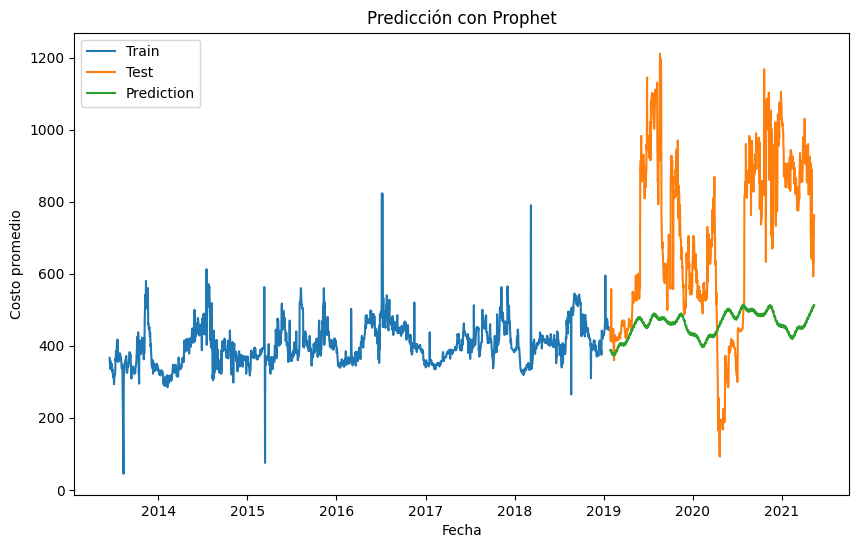

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast['yhat'], label='Prediction')
plt.legend(loc='best')
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio')

plt.show()

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

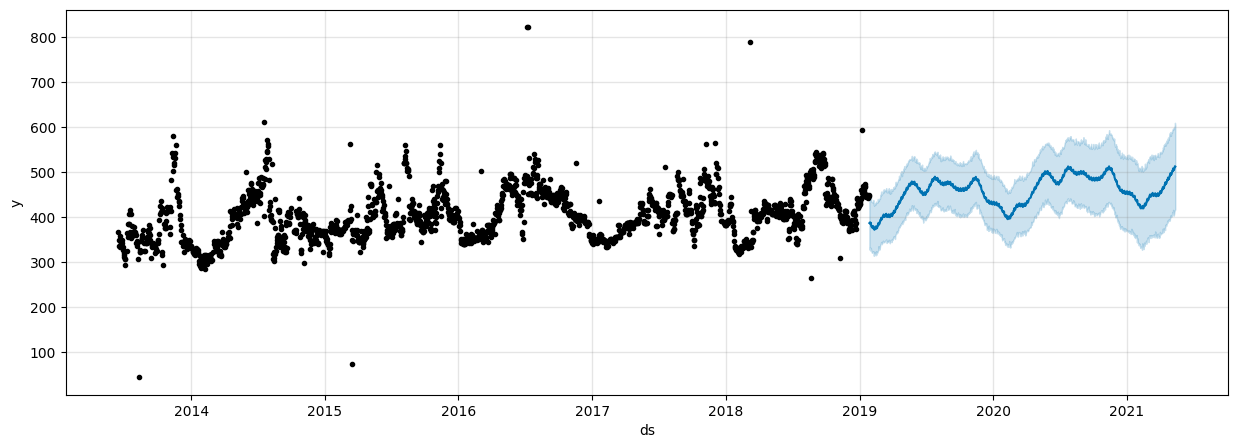

In [15]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

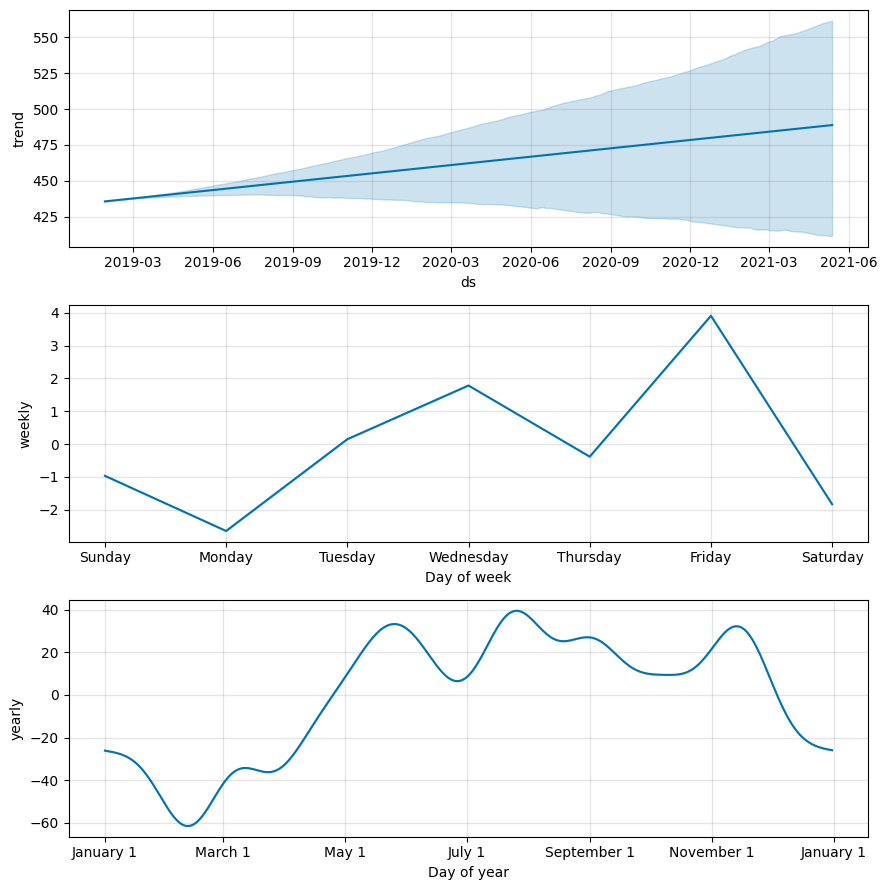

In [16]:
# descomposición por componentes, estático
fig = model.plot_components(forecast)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

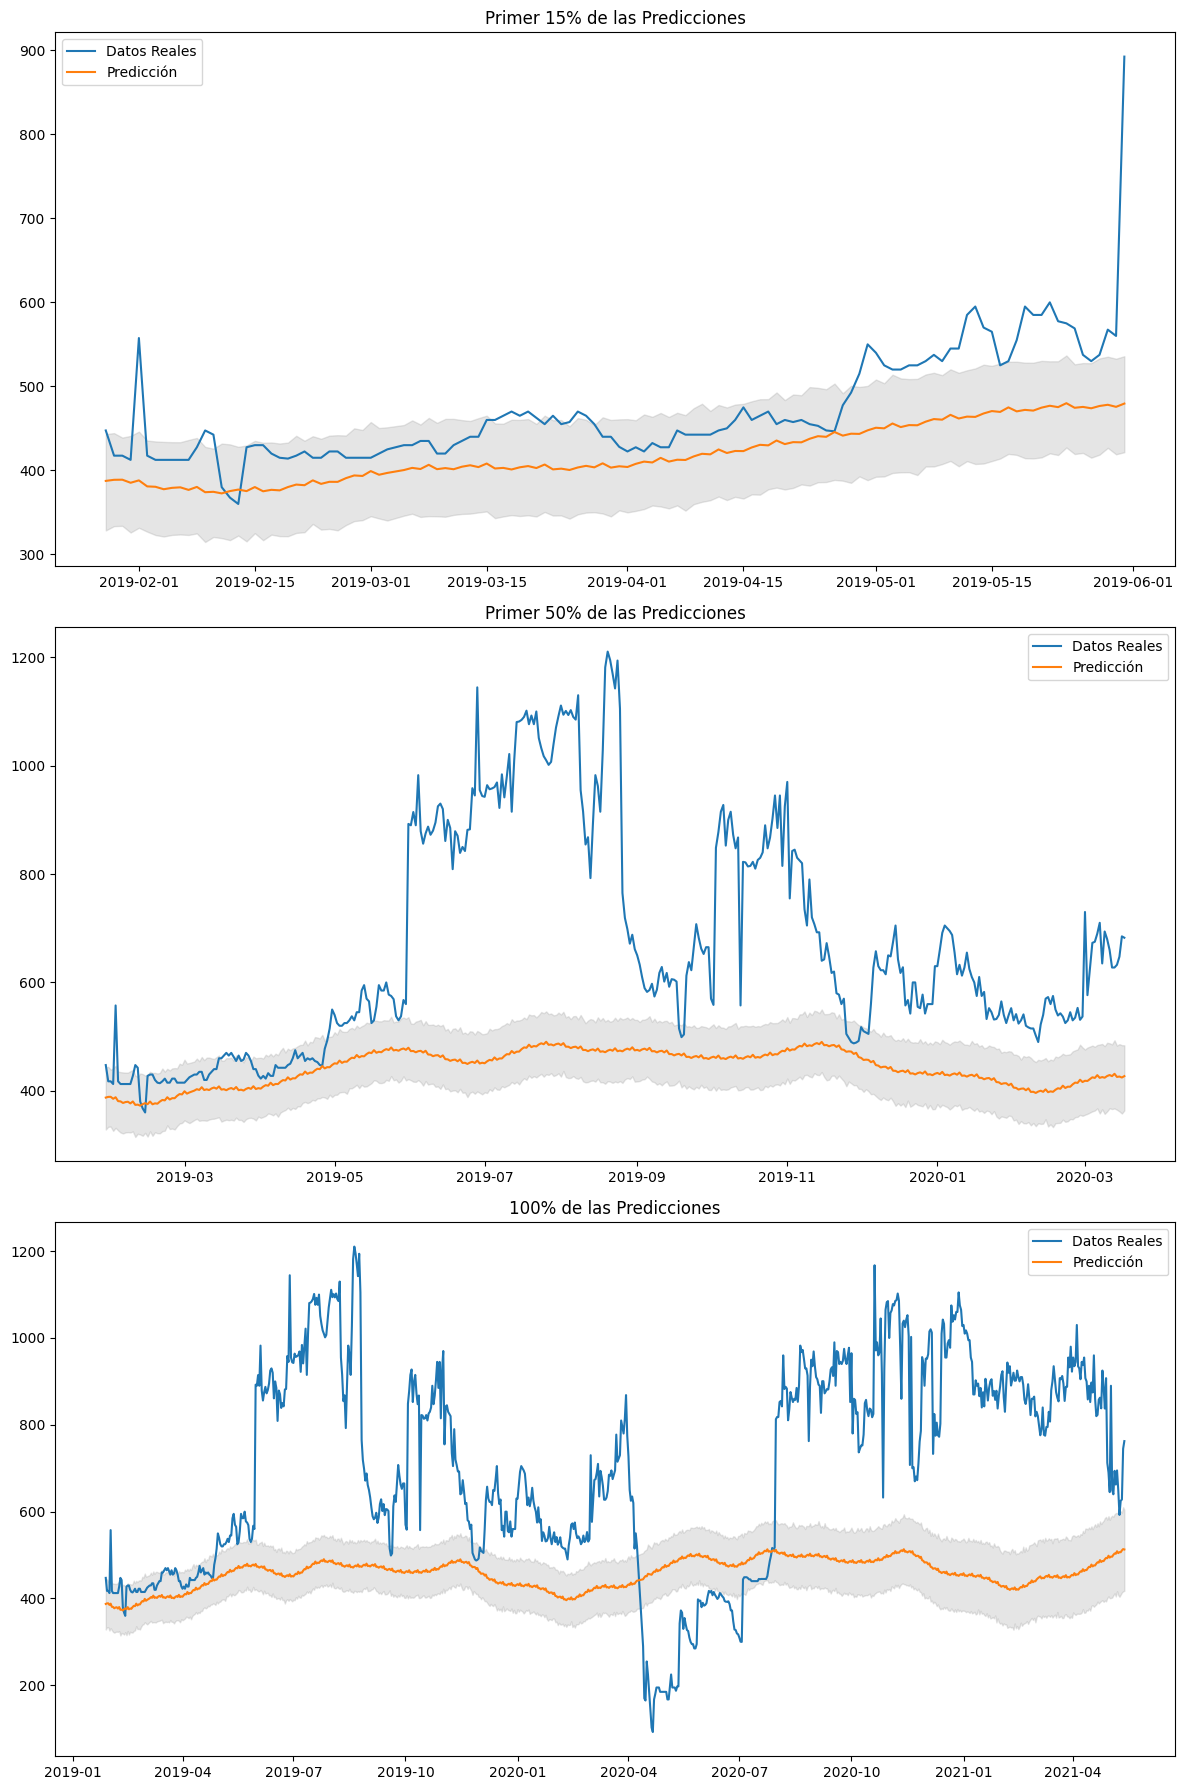

RMSE: 336.41931200776617
MAE: 281.86223351057663
MAPE: 0.39149618236427675


In [17]:
# Respuesta

total_len = len(forecast)
fifteen_percent_idx = int(total_len * 0.15)
fifty_percent_idx = int(total_len * 0.50)


fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico del primer 15%
axes[0].plot(df_test['ds'][:fifteen_percent_idx], df_test['y'][:fifteen_percent_idx], label='Datos Reales')
axes[0].plot(forecast['ds'][:fifteen_percent_idx], forecast['yhat'][:fifteen_percent_idx], label='Predicción')
axes[0].fill_between(forecast['ds'][:fifteen_percent_idx], forecast['yhat_lower'][:fifteen_percent_idx], forecast['yhat_upper'][:fifteen_percent_idx], color='gray', alpha=0.2)
axes[0].set_title('Primer 15% de las Predicciones')
axes[0].legend()

# Gráfico del primer 50%
axes[1].plot(df_test['ds'][:fifty_percent_idx], df_test['y'][:fifty_percent_idx], label='Datos Reales')
axes[1].plot(forecast['ds'][:fifty_percent_idx], forecast['yhat'][:fifty_percent_idx], label='Predicción')
axes[1].fill_between(forecast['ds'][:fifty_percent_idx], forecast['yhat_lower'][:fifty_percent_idx], forecast['yhat_upper'][:fifty_percent_idx], color='gray', alpha=0.2)
axes[1].set_title('Primer 50% de las Predicciones')
axes[1].legend()

# Gráfico del 100% de los datos
axes[2].plot(df_test['ds'], df_test['y'], label='Datos Reales')
axes[2].plot(forecast['ds'], forecast['yhat'], label='Predicción')
axes[2].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
axes[2].set_title('100% de las Predicciones')
axes[2].legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


rmse = np.sqrt(mean_squared_error(df_test['y'], forecast['yhat']))
mae = mean_absolute_error(df_test['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(df_test['y'], forecast['yhat'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [54]:
# Respuesta

model = Prophet(holidays_prior_scale=7)

model.add_country_holidays(country_name='CL')
model.fit(df_train)




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/xiwa40c7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/8fgkmzdt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88843', 'data', 'file=/tmp/tmpl852apsb/xiwa40c7.json', 'init=/tmp/tmpl852apsb/8fgkmzdt.json', 'output', 'file=/tmp/tmpl852apsb/prophet_model1cs1kzd6/prophet_model-20240527022337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:23:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**2. Predecir**

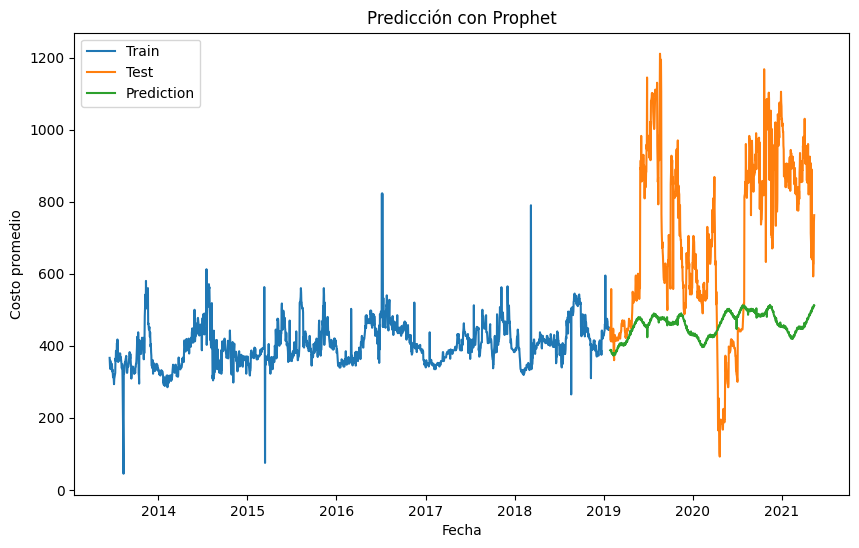

In [55]:
# Respuesta
## Predecir

prediction = model.predict(df_test)

## Graficar

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, prediction['yhat'], label='Prediction')
plt.legend(loc='best')
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio')

plt.show()

**3. Resultados**

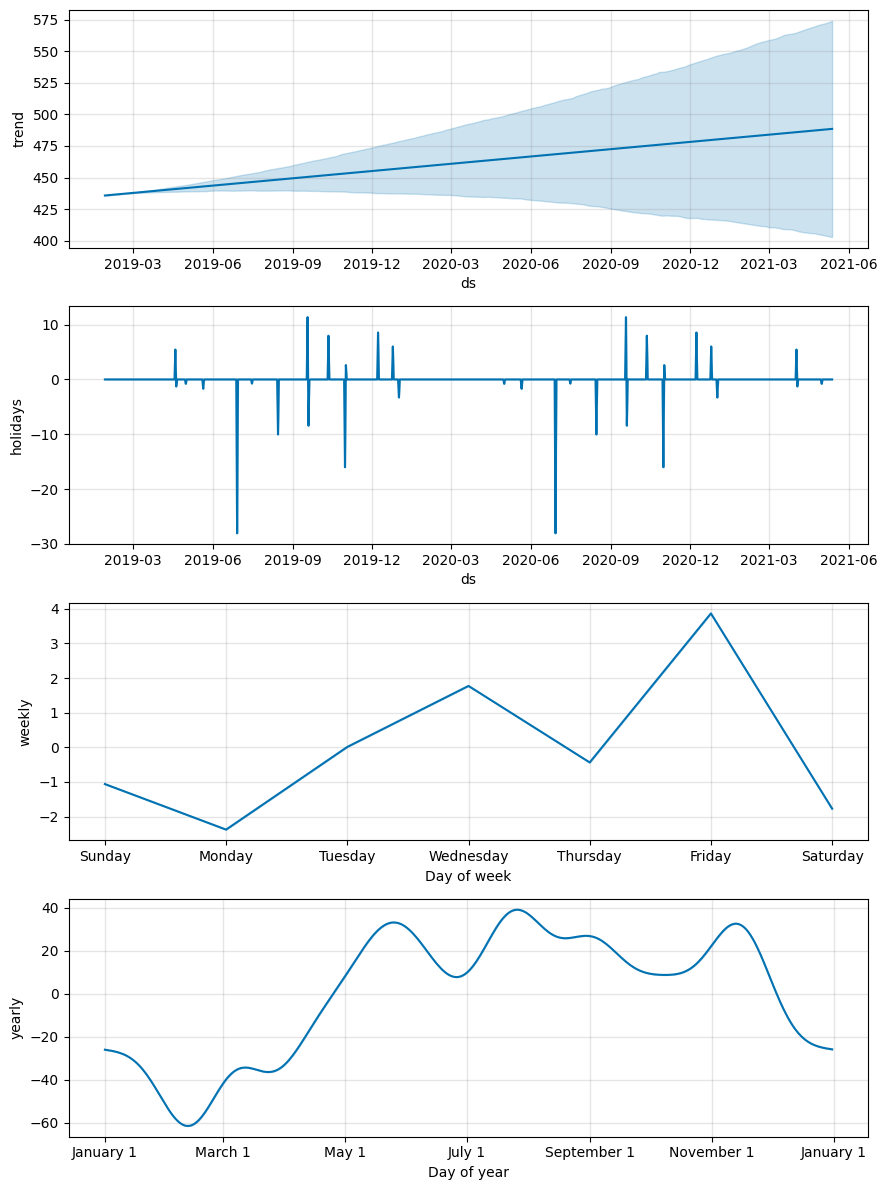

In [56]:
# Respuesta
fig = model.plot_components(prediction)

#plot de componentes

#plot de predicción

#resultados

¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

> Las predicciones son casi idénticas. Hay más factores que pueden estar afectando los precios en general, como la inflación y la pandemia. Podemos observar esto porque los precios en promedio crecen drásticamente en comparación la curva general de los datos de entrenamiento. Ambos modelos nos muestran que los precios de las frutas y verduras no fueron los precios que se debieron haber observado, el estar lejano de la predicción nos dice que hay fuertes valores atípicos durante el periodo final.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/a5ylhlnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl852apsb/hkn9ncgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30187', 'data', 'file=/tmp/tmpl852apsb/a5ylhlnh.json', 'init=/tmp/tmpl852apsb/hkn9ncgf.json', 'output', 'file=/tmp/tmpl852apsb/prophet_model38kcpaf0/prophet_model-20240527022508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:25:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:25:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


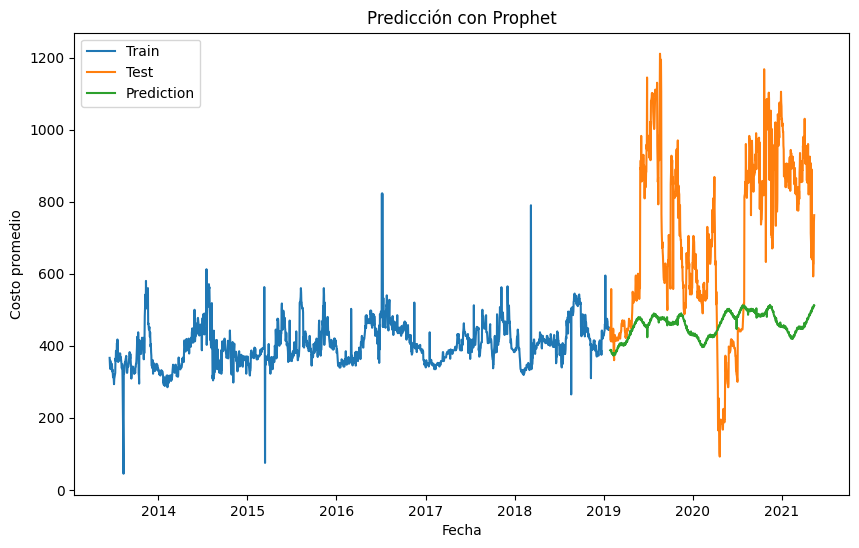

In [57]:
# Respuesta

## Crear valores 1 y 0, 1 para invierno

df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['ds'])

df_train['Winter'] = df_train['ds'].apply(lambda x: 1 if x.month in [6, 7, 8, 9] else 0)
df_test['Winter'] = df_test['ds'].apply(lambda x: 1 if x.month in [6, 7, 8, 9] else 0)

# Crear modelo con regresor
model = Prophet()
model.add_regressor('Winter')

model = Prophet(holidays_prior_scale=7)
model.add_country_holidays(country_name='CL')


# Ajustar modelo
model.fit(df_train)

## Predecir
prediction = model.predict(df_test)

## Graficar

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, prediction['yhat'], label='Prediction')
plt.legend(loc='best')
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio')

plt.show()

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [22]:
# se instala surprise library

%pip install surprise

In [23]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [24]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.describe()

,user_id,prod_id,rating
count,164007.000000,164007.000000,164007.000000
mean,4030.712994,3383.162456,4.308292
std,2312.985882,1919.967057,1.042656
min,0.000000,0.000000,1.000000
25%,2041.000000,1738.000000,4.000000
50%,4050.000000,3386.000000,5.000000
75%,6015.000000,5091.000000,5.000000
max,8013.000000,6726.000000,5.000000


In [25]:
#Limpiar y explorar el dataset.

#Quiero ver si rating tiene valores no enteros
df['rating'].value_counts()




rating
5.0    97092
4.0    39327
3.0    14835
2.0     6564
1.0     6189
Name: count, dtype: int64

### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [26]:
# Respuesta
print("Cantidad de usuarios únicos:", df['user_id'].nunique())
print("Cantidad de productos únicos:", df['prod_id'].nunique())

Cantidad de usuarios únicos: 8014
Cantidad de productos únicos: 6727


Verificar que no hayan valores nulos

In [27]:
# Respuesta
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

Graficar distribución de los ratings

<Axes: >

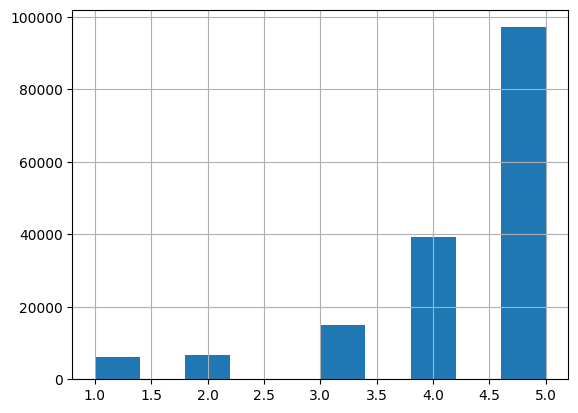

In [28]:
# Respuesta
df['rating'].hist()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [29]:
# Respuesta

print('Top 5 de usuarios con mayores interacciones')
display(df['user_id'].value_counts().head(5))

print('Top 5 de productos con mayores interacciones')
display(df['prod_id'].value_counts().head(5))


Top 5 de usuarios con mayores interacciones


user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: count, dtype: int64

Top 5 de productos con mayores interacciones


prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: count, dtype: int64

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. No hay valores nulos en el dataset, en ninguna columna.
2. El histograma muestra que la mayoría de las calificaciones están en el extremo superior de la escala, en el especial en el 5, lo cual muestra que los usuarios tienden a dar calificaciones altas a los productos.
3. El análisis muestra que existen 8014 usuarios únicos y 6727 productos únicos, sin embargo, el usuario con más interacciones tiene 283 y el producto con más interacciones tiene 611, lo cual indica que algunos usuarios son mucho más activos que otros y ciertos productos son mucho más populares.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [30]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [31]:
from surprise.model_selection import train_test_split

# Respuesta
trainset, testset = train_test_split(dataset, test_size=0.3, random_state=42)



## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [32]:
from surprise.prediction_algorithms.random_pred import NormalPredictor


# Respuesta
model = NormalPredictor()
model.fit(trainset)
predictions = model.test(testset)

In [33]:
# Evaluar con MAE
from surprise.accuracy import mse
mse(predictions)

MSE: 1.7826


1.782614092382197

Un MSE mayor a 1 indica que hay errores de predicción significativos en relación con la escala de 1 a 5 en rating, lo cual podría ser porque el modelo no captura bien las calificaciones extremas, especialmente las pocas calificaciones bajas, ya que se concentra más en 4 y 5.

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [34]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user

  predicted_ratings =  [pred for pred in predictions if pred.uid == user]

  # Ordenar las predicciones
  sorted_predicted_ratings = sorted(predicted_ratings, key=lambda x: x.est, reverse=True)

  return sorted_predicted_ratings[:k]

In [35]:
from surprise.accuracy import mse
import random
random.seed(42)

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)

# entrenar

user_model.fit(trainset)
#predecir en dataframe de testeo

predictions =  user_model.test(testset)# retornar un dataframe con el rating estimado para cada (user_id, item_id)

# obtener mse
mse(predictions)



Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122


1.212159526775385

In [36]:
random.seed(42)
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.799755049750801, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.399861310283875, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False})]

In [37]:
random.seed(42)
# entrenar algoritmo base a items, obtener MSE

sim_options = {'name': 'cosine',
               'user_based': False}

# algoritmo base a items.

item_model = KNNBasic(sim_options=sim_options)

# entrenar

item_model.fit(trainset)
#predecir en dataframe de testeo

predictions =  item_model.test(testset)
# obtener mse
mse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2328


1.23280223807978

In [38]:
random.seed(42)
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.857142857142857, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.856937449847549, details={'actual_k': 7, 'was_impossible': False})]

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline? El modelo basado en usuario tiene un menor MSE comparado con el modelo basado en ítem y el Baseline, lo cual indica un mejor rendimiento.
- Obtenga el rating que le asignaria el usuario 3 al producto 3906. ¿Son diferentes sus resultados? ¿Porqué?
Si  son diferentes, puede ser debido a las diferencias en cómo se calculan las similitudes, porque una es por producto y otro por usuario.
- Obtenga las 5 mejores recomendaciones para el usuario 2170 usando ambos enfoques y compare sus resultados. Dieron diferentes resultados, en el orden y diferentes estimaciones.

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [39]:
# Respuesta
random.seed(42)
model = SVD()
model.fit(trainset)


# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)

predictions =model.test(testset)


In [40]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

MAE:  0.6936


0.6935924277305757

In [41]:
random.seed(42)
example = [(3, 3906, None)]
svd_pred_example = model.test(example)
print(svd_pred_example)
# Obtener 5 mejores recomendaciones para el usuario 2170
get_user_top_k(predictions, user=2170, k=5)


[Prediction(uid=3, iid=3906, r_ui=None, est=3.167037565192901, details={'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.8678812435207455, details={'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.8007844092291, details={'was_impossible': False}),
 Prediction(uid=2170, iid=5990, r_ui=4.0, est=4.799828532372899, details={'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.6600223607482265, details={'was_impossible': False})]

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?

Los modelos basados en memoria utilizan similitudes entre usuarios o producto id para realizar las predicciones, mientras que SVD reduce la dimensionalidad y captura las relaciones entre usuarios y producto_id.

- ¿Qué significa el parámetro num_factors? ¿De qué manera podría impactar en el ajuste del modelo?

num_factors es la cantidad de características latentes que describen las interacciones entre usuarios e productos id. Un mayor número de factores puede capturar más información, pero también puede llevar a un sobreajuste si es demasiado alto.


- ¿Qué indican los parámetros  μ ,  bu ,  bi ? ¿Qué cuidado se debe tener al utilizarlos?

μ es la media global, bu es el sesgo del usuario, bi es el sesgo del producto.
Se puede tener un sobreajuste, ya que se puede adaptar demasiado a los datos de entrenamiento y no generalice bien.

- ¿Se alcanza un mejor rendimiento con respecto al Baseline?
Sí, el MSE es menor a 1, a comparación de los otros modelos.

- Obtenga el rating que le asignaria el usuario 3 al producto 3906. ¿Son diferentes sus resultados? ¿Porqué?

Sí, pero se acerca más al de usuarios, porque esta junta como ambas formas y no solo se centra en user o en producto.

- Obtenga las 5 mejores recomendaciones para el usuario 2170 usando ambos enfoques y compare sus resultados.-

En general, dieron diferentes pero se acerca más a usuarios.


###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?


El SVD presenta mejores recomendaciones. pero es más porque reduce la dimensionalidad obteniendo una relacion user-producto, en vez de basarse en user o producto, los modelos basados en memoria, que solo consideran similitudes directas.
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

Si es posible mejorarlo, se podría incluir especificaciones como   μ ,  bu ,  bi, y otra recomendacion es medir con diferentes números de factores.
